In [1]:
import numpy as np

from fromscratchtoml.toolbox import binary_visualize
from fromscratchtoml.toolbox.random import Distribution

from sklearn.datasets import load_iris

from fromscratchtoml.cluster import DBSCAN

%matplotlib inline

## DBSCAN - Density-based spatial clustering of applications with noise

In [2]:
eps = 0.6
min_points = 10

X1 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[0, 0])
X2 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[0, -6])
X3 = Distribution.linear(pts=500, covr=[[0, -1],[-1, 0]], mean=[6, -3])

X = np.vstack([X1, X2, X3])

/home/markroxor/Documents/jellAIfish/venv_fs2ml/local/lib/python2.7/site-packages/fromscratchtoml-0.0.2-py2.7.egg/fromscratchtoml/toolbox/random.py:50: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, covr, pts)


In [3]:
db10 = DBSCAN(eps, min_points)
db10.fit(X)

DBSCAN({'eps': 0.6, 'min_neigh': 10})

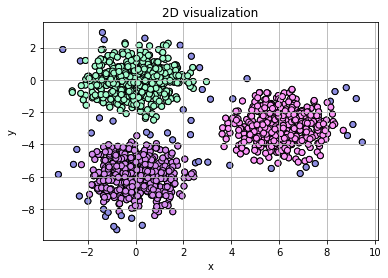

In [5]:
binary_visualize(X, db10.clan)

In [26]:
from bokeh.models import CustomJS, Slider
from bokeh.layouts import column, row

from bokeh.plotting import figure, show, ColumnDataSource, output_notebook
from bokeh.palettes import Set3
output_notebook()

x = X[:, 0]
y = X[:, 1]
colored_y = [Set3[12][int(db10.clan[i])] for i in range(len(db10.clan))]
line_color = ['black' for i in range(len(db10.clan))]

import pickle
with open('DBSCAN_fill_colors.pkl', 'rb') as f:
    fill_colors = pickle.load( f)
    
source = ColumnDataSource(data=dict(x=x, y=y, color=colored_y, line_color=line_color))

p = figure(plot_height=600, plot_width=800, title="word2vec")
p.circle('x','y', radius=0.1, fill_color='color', source=source, line_color='line_color')

callback = CustomJS(args=dict(source=source, fill_colors=fill_colors), code="""
    var data = source.data
    var value = cb_obj.value

    data.color = fill_colors[value]
    source.change.emit();
""")

slider = Slider(start=1, end=10, value=10, step=1, title="Min points",
                callback=callback)
layout = column(slider, p)

show(layout)

Loading BokehJS ...

In [25]:
%% cache
fill_colors = {}
for j in range(2, 11):
    print(j)
    db = DBSCAN(eps, j)
    db.fit(X)
    fill_colors[j] = [Set3[12][int(db.clan[i])] for i in range(len(db.clan))]
    
import pickle
with open('DBSCAN_fill_colors.pkl', 'wb') as f:
    pickle.dump(fill_colors, f)

UsageError: Cell magic `%%` not found.


## Classifying against custom data

In [ ]:
x1 = Distribution.linear(pts=10, mean=[0, 20])
y1 = np.ones([len(x1), 1])

x2 = Distribution.linear(pts=10, mean=[0, 0])
y2 = -np.ones([len(x2), 1])

x3 = Distribution.linear(pts=10, mean=[2, 10])
y3 = 2*np.ones([len(x3), 1])

X = np.vstack([x1, x2, x3])
Y = np.vstack([y1, y2, y3])

In [ ]:
eps = 2
min_points = 2

In [ ]:
db = DBSCAN(eps, min_points)
db.fit(X)

In [ ]:
binary_visualize(X, db.clan)